<a href="https://colab.research.google.com/github/ghscharf/DA-Python/blob/master/DA_Unit3_Project2_GScharf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Background

The data used in this analysis is the Chronic Disease Indicators (CDI) dataset sourced from the CDC. This is a very large dataset containing nearly 815,000 records across a total of 124 indicators related to chronic disease. The dataset was created in 2016 and last updated in January 2020. Definition of each indicator as well as data parameters can be found in the [2015 Morbidity and Mortality Weekly Report](https://www.cdc.gov/mmwr/pdf/rr/rr6401.pdf) (MMWR).

#Data Acquisition

The data was acquired by accessing the CDI dataset via API using the Python pandas and sodapy grab-and-go codes provided by the CDC [here](https://dev.socrata.com/foundry/chronicdata.cdc.gov/g4ie-h725). In order to more easily manipulate the dataset, I limited the access to 10,000 records. The results were then converted into a dataframe. Next, I did a simple examination of the CDI dataframe by pulling the first 5 records and identifying the shape of the dataframe, which is 10,000 rows and 26 columns. I also did some simple queries to get a basic sense of the dataframe, including the number of unique topics and unique questions (i.e. indicators). Lastly, I queried the count in each topic to determine which topic I wanted to conduct the analysis on, since I wanted to make sure the topic I chose had a substantial amount of records to allow for productive analysis. I ended up choosing Overarching Conditions as my topic of analysis, from which I developed my research questions.

In [47]:
import pandas as pd

In [48]:
!pip install sodapy
from sodapy import Socrata

In [49]:
client = Socrata("chronicdata.cdc.gov",None)

In [50]:
cdi = client.get("g4ie-h725", limit=10000)

In [51]:
cdi_df = pd.DataFrame.from_records(cdi)

In [52]:
cdi_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
0,2017,2017,RI,Rhode Island,YRBSS,Tobacco,Current smokeless tobacco use among youth,%,Crude Prevalence,8.0,8.0,5.2,12.3,Gender,Male,"{'latitude': '41.70828019300046', 'longitude':...",44,TOB,TOB2_1,CRDPREV,GENDER,GENM,27,2658,NaN,NaN
1,2013,2013,MS,Mississippi,BRFSS,Arthritis,Fair or poor health among adults aged >= 18 ye...,%,Crude Prevalence,46.9,46.9,42.3,51.6,Gender,Male,"{'latitude': '32.745510099000455', 'longitude'...",28,ART,ART4_0,CRDPREV,GENDER,GENM,32,494,NaN,NaN
2,2016,2016,KY,Kentucky,BRFSS,Cancer,Papanicolaou smear use among adult women aged ...,%,Age-adjusted Prevalence,76.9,76.9,59.4,88.3,Race/Ethnicity,"Multiracial, non-Hispanic","{'latitude': '37.645970271000465', 'longitude'...",21,CAN,CAN2_1,AGEADJPREV,RACE,MRC,36,235,NaN,NaN
3,2015,2015,KS,Kansas,BRFSS,Tobacco,Quit attempts in the past year among current s...,%,Age-adjusted Prevalence,53.2,53.2,50.3,56.0,Gender,Male,"{'latitude': '38.34774030000045', 'longitude':...",20,TOB,TOB3_0,AGEADJPREV,GENDER,GENM,17,1287,NaN,NaN
4,2015,2015,ND,North Dakota,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,8.9,8.9,8.2,9.6,Race/Ethnicity,"White, non-Hispanic","{'latitude': '47.47531977900047', 'longitude':...",38,OVC,OVC3_1,CRDPREV,RACE,WHT,3,568,NaN,NaN


In [53]:
cdi_df.shape

(10000, 26)

In [54]:
cdi_df.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'topic', 'question', 'datavalueunit', 'datavaluetype', 'datavalue',
       'datavaluealt', 'lowconfidencelimit', 'highconfidencelimit',
       'stratificationcategory1', 'stratification1', 'geolocation',
       'locationid', 'topicid', 'questionid', 'datavaluetypeid',
       'stratificationcategoryid1', 'stratificationid1',
       ':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8',
       'datavaluefootnotesymbol', 'datavaluefootnote'],
      dtype='object')

In [55]:
# number of unique topics
cdi_df.topic.unique()

array(['Tobacco', 'Arthritis', 'Cancer', 'Overarching Conditions',
       'Disability', 'Alcohol', 'Asthma', 'Older Adults',
       'Cardiovascular Disease',
       'Nutrition, Physical Activity, and Weight Status',
       'Chronic Obstructive Pulmonary Disease', 'Chronic Kidney Disease',
       'Diabetes', 'Oral Health', 'Mental Health', 'Immunization',
       'Reproductive Health'], dtype=object)

In [56]:
# number of unique locations or states
cdi_df.locationabbr.unique()

array(['RI', 'MS', 'KY', 'KS', 'ND', 'AZ', 'IA', 'CT', 'US', 'AR', 'NE',
       'IL', 'SD', 'TN', 'GU', 'VA', 'PR', 'ID', 'WY', 'MN', 'CO', 'MD',
       'NM', 'UT', 'MT', 'OH', 'MO', 'PA', 'AL', 'DE', 'NY', 'NV', 'VI',
       'NC', 'OR', 'LA', 'MI', 'ME', 'WI', 'VT', 'WV', 'GA', 'HI', 'TX',
       'NJ', 'FL', 'AK', 'CA', 'OK', 'DC', 'SC', 'IN', 'MA', 'WA', 'NH'],
      dtype=object)

In [57]:
# number of unique questions or indicators
cdi_df.question.unique()

array(['Current smokeless tobacco use among youth',
       'Fair or poor health among adults aged >= 18 years with arthritis',
       'Papanicolaou smear use among adult women aged 21-65 years',
       'Quit attempts in the past year among current smokers', 'Poverty',
       'Disability among adults aged >= 65 years',
       'Chronic liver disease mortality',
       'Arthritis among adults aged >= 18 years', 'Asthma mortality rate',
       'Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years',
       'Mortality from diseases of the heart',
       'Hospitalization for stroke',
       'Heavy drinking among adults aged >= 18 years',
       'Cancer of the female breast, mortality',
       'Cancer of the colon and rectum (colorectal), mortality',
       'Melanoma, mortality',
       'Arthritis among adults aged >= 18 years who are obese',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Binge drinking fre

In [58]:
# count of each topic
cdi_df.groupby(['topic'])['datavalue'].count()

topic
Alcohol                                            1036
Arthritis                                          1036
Asthma                                              894
Cancer                                              562
Cardiovascular Disease                              805
Chronic Kidney Disease                              216
Chronic Obstructive Pulmonary Disease               145
Diabetes                                            742
Disability                                           50
Immunization                                         96
Mental Health                                       185
Nutrition, Physical Activity, and Weight Status     508
Older Adults                                        199
Oral Health                                         507
Overarching Conditions                              962
Reproductive Health                                  64
Tobacco                                             431
Name: datavalue, dtype: int64

#Research Questions

Q1) Provide basic insights into the Overarching Conditions dataset.

Q2) Identify 3-4 questions/indicators for further analysis such as descriptive statistics.

Q3) For each of the indicators chosen, subset the data by state.

Q4) For each of the chosen indicators, trend the data over time.

Q5) Further explore the chosen indicators using visualization packages such as seaborn and plotly.

#Data Wrangling

In [59]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**1) Basic Insights:**
---



Since I chose Overarching Conditions (OC) as my topic of analysis, I first subsetted the CDI dataset to focus on the OC data. This subset has 1005 records. Next, I queried the unique questions or indicators in the OC dataset, as well as the count of each. The results led me to choose 4 of the indicators with over 100 data values to focus my subsequent analysis on. These 4 indicators are listed later on. I queried the columns again for ease of review, and also pulled the first 5 and last 5 records in this dataset. 

In [60]:
oc_df = cdi_df[cdi_df['topic']=='Overarching Conditions']

In [61]:
oc_df

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
4,2015,2015,ND,North Dakota,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,8.9,8.9,8.2,9.6,Race/Ethnicity,"White, non-Hispanic","{'latitude': '47.47531977900047', 'longitude':...",38,OVC,OVC3_1,CRDPREV,RACE,WHT,3,568,NaN,NaN
122,2016,2016,OK,Oklahoma,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,69,69,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,"{'latitude': '35.47203135600046', 'longitude':...",40,OVC,OVC5_0,NMBR,RACE,API,20,712,NaN,NaN
370,2018,2018,VI,Virgin Islands,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,NaN,NaN,NaN,NaN,Gender,Female,"{'latitude': '18.335765', 'longitude': '-64.89...",78,OVC,OVC7_2,MEAN,GENDER,GENF,NaN,NaN,-,No data available
372,2018,2018,NV,Nevada,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,%,Crude Prevalence,83.1,83.1,78.5,86.8,Overall,Overall,"{'latitude': '39.493240390000494', 'longitude'...",32,OVC,OVC6_2,CRDPREV,OVERALL,OVR,10,481,NaN,NaN
374,2018,2018,PA,Pennsylvania,BRFSS,Overarching Conditions,Current lack of health insurance among adults ...,%,Crude Prevalence,11.6,11.6,9.7,13.8,Gender,Male,"{'latitude': '40.79373015200048', 'longitude':...",42,OVC,OVC1_1,CRDPREV,GENDER,GENM,48,2495,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,2015,2015,OK,Oklahoma,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,4.6,4.6,4.3,4.9,Overall,Overall,"{'latitude': '35.47203135600046', 'longitude':...",40,OVC,OVC7_1,MEAN,OVERALL,OVR,20,712,NaN,NaN
9674,2015,2015,LA,Louisiana,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,4126,4126,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '31.31266064400046', 'longitude':...",22,OVC,OVC5_0,NMBR,RACE,BLK,22,1697,NaN,NaN
9825,2014,2014,MA,Massachusetts,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,30.6,30.6,29,32.2,Race/Ethnicity,Hispanic,"{'latitude': '42.27687047000046', 'longitude':...",25,OVC,OVC3_1,CRDPREV,RACE,HIS,25,1919,NaN,NaN
9884,2015,2015,ID,Idaho,Current Population Survey,Overarching Conditions,Poverty among women aged 18-44 years,%,Crude Prevalence,35.5,35.5,NaN,NaN,Overall,Overall,"{'latitude': '43.682630005000476', 'longitude'...",16,OVC,OVC3_2,CRDPREV,OVERALL,OVR,5,1687,NaN,NaN


In [62]:
oc_df.question.unique()

array(['Poverty', 'Premature mortality among adults aged 45-64 years',
       'Recent activity limitation among adults aged >= 18 years',
       'Self-rated health status among women aged 18-44 years',
       'Current lack of health insurance among adults aged 18-64 years',
       'Recent physically unhealthy days among adults aged >= 18 years',
       'Fair or poor self-rated health status among adults aged >= 18 years',
       'Prevalence of sufficient sleep among adults aged >= 18 years',
       'High school completion among adults aged 18-24 years',
       'Gini Index of income inequality',
       'Current health care coverage among women aged 18-44 years',
       'High school completion among women aged 18-44 years',
       'Poverty among women aged 18-44 years', 'Life expectancy at birth',
       'Life expectancy at age 65 years',
       'Health insurance coverage before pregnancy'], dtype=object)

In [63]:
oc_df.shape

(1005, 26)

In [64]:
oc_df.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'topic', 'question', 'datavalueunit', 'datavaluetype', 'datavalue',
       'datavaluealt', 'lowconfidencelimit', 'highconfidencelimit',
       'stratificationcategory1', 'stratification1', 'geolocation',
       'locationid', 'topicid', 'questionid', 'datavaluetypeid',
       'stratificationcategoryid1', 'stratificationid1',
       ':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8',
       'datavaluefootnotesymbol', 'datavaluefootnote'],
      dtype='object')

In [65]:
oc_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
4,2015,2015,ND,North Dakota,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,8.9,8.9,8.2,9.6,Race/Ethnicity,"White, non-Hispanic","{'latitude': '47.47531977900047', 'longitude':...",38,OVC,OVC3_1,CRDPREV,RACE,WHT,3,568,NaN,NaN
122,2016,2016,OK,Oklahoma,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,69,69,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,"{'latitude': '35.47203135600046', 'longitude':...",40,OVC,OVC5_0,NMBR,RACE,API,20,712,NaN,NaN
370,2018,2018,VI,Virgin Islands,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,NaN,NaN,NaN,NaN,Gender,Female,"{'latitude': '18.335765', 'longitude': '-64.89...",78,OVC,OVC7_2,MEAN,GENDER,GENF,NaN,NaN,-,No data available
372,2018,2018,NV,Nevada,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,%,Crude Prevalence,83.1,83.1,78.5,86.8,Overall,Overall,"{'latitude': '39.493240390000494', 'longitude'...",32,OVC,OVC6_2,CRDPREV,OVERALL,OVR,10,481,NaN,NaN
374,2018,2018,PA,Pennsylvania,BRFSS,Overarching Conditions,Current lack of health insurance among adults ...,%,Crude Prevalence,11.6,11.6,9.7,13.8,Gender,Male,"{'latitude': '40.79373015200048', 'longitude':...",42,OVC,OVC1_1,CRDPREV,GENDER,GENM,48,2495,NaN,NaN


In [66]:
oc_df.tail()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
9554,2015,2015,OK,Oklahoma,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,4.6,4.6,4.3,4.9,Overall,Overall,"{'latitude': '35.47203135600046', 'longitude':...",40,OVC,OVC7_1,MEAN,OVERALL,OVR,20,712,NaN,NaN
9674,2015,2015,LA,Louisiana,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,4126,4126,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '31.31266064400046', 'longitude':...",22,OVC,OVC5_0,NMBR,RACE,BLK,22,1697,NaN,NaN
9825,2014,2014,MA,Massachusetts,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,30.6,30.6,29,32.2,Race/Ethnicity,Hispanic,"{'latitude': '42.27687047000046', 'longitude':...",25,OVC,OVC3_1,CRDPREV,RACE,HIS,25,1919,NaN,NaN
9884,2015,2015,ID,Idaho,Current Population Survey,Overarching Conditions,Poverty among women aged 18-44 years,%,Crude Prevalence,35.5,35.5,NaN,NaN,Overall,Overall,"{'latitude': '43.682630005000476', 'longitude'...",16,OVC,OVC3_2,CRDPREV,OVERALL,OVR,5,1687,NaN,NaN
9917,2015,2015,IA,Iowa,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,"cases per 100,000",Crude Rate,724.9,724.9,698.7,751.1,Gender,Male,"{'latitude': '42.46940091300047', 'longitude':...",19,OVC,OVC5_0,CRDRATE,GENDER,GENM,16,281,NaN,NaN


**2) Modify Dataset / Data Tidying**
---



Next, I wanted to perform some data tidying to exclude data irrelevant to my analysis. First I identified the columns I wanted to keep and made a list out of them. Then I modified the OC dataset to include those columns only.

In [67]:
keep_columns = ['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'topic', 'question', 'datavalueunit', 'datavaluetype', 'datavalue',
       'datavaluealt', 'lowconfidencelimit', 'highconfidencelimit']

In [68]:
oc_clean_df = oc_df[keep_columns]

In [69]:
oc_clean_df

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
4,2015,2015,ND,North Dakota,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,8.9,8.9,8.2,9.6
122,2016,2016,OK,Oklahoma,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,69,69,NaN,NaN
370,2018,2018,VI,Virgin Islands,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,NaN,NaN,NaN,NaN
372,2018,2018,NV,Nevada,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,%,Crude Prevalence,83.1,83.1,78.5,86.8
374,2018,2018,PA,Pennsylvania,BRFSS,Overarching Conditions,Current lack of health insurance among adults ...,%,Crude Prevalence,11.6,11.6,9.7,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,2015,2015,OK,Oklahoma,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,4.6,4.6,4.3,4.9
9674,2015,2015,LA,Louisiana,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,4126,4126,NaN,NaN
9825,2014,2014,MA,Massachusetts,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,30.6,30.6,29,32.2
9884,2015,2015,ID,Idaho,Current Population Survey,Overarching Conditions,Poverty among women aged 18-44 years,%,Crude Prevalence,35.5,35.5,NaN,NaN


**3) Subsetting the Data**
---

The results from the previous query on count of unique indicators led me to choose 4 of the indicators with over 100 data values to focus my subsequent analysis on. These 4 indicators are: 1) Recent physically unhealthy days among adults (“Unhealthy”), 2) Prevalence of sufficient sleep among adults (“Sleep”), 3) Recent activity limitation among adults (“Activity”), and 4) Premature mortality among adults (“Premort”). For each of these indicators, I subsetted the OC dataset to create a even smaller subset. I also made sure to subset on data values that belong to the same data value unit, which is not consistent for all records. In addition, I noticed some missing values (NaN) in each indicator subset, so I made sure to drop those as well. However, attempt to drop missing values from the Premature Mortality subset yields an empty dataframe, which means that there were no missing values in the subset. For each indicator subset, I also pivoted the data by state. However, before I could perform the pivot, I had to convert the “data value” column to numeric format, as it is originally in the string format. Lastly, I subsetted the OC dataset by state and indicator, and queried the first 20 and last 20 records, which shows that not every state has a data value for a specific indicator.


In [70]:
oc_clean_df.groupby(['question'])['datavalue'].count()

question
Current health care coverage among women aged 18-44 years               40
Current lack of health insurance among adults aged 18-64 years         116
Fair or poor self-rated health status among adults aged >= 18 years    114
Gini Index of income inequality                                          8
Health insurance coverage before pregnancy                               1
High school completion among adults aged 18-24 years                    17
High school completion among women aged 18-44 years                      6
Life expectancy at age 65 years                                         12
Life expectancy at birth                                                 8
Poverty                                                                 96
Poverty among women aged 18-44 years                                     8
Premature mortality among adults aged 45-64 years                      111
Prevalence of sufficient sleep among adults aged >= 18 years           133
Recent activity 

In [76]:
#Subset the data for Recent physically unhealthy days among adults aged >= 18 years
unhealthy_df = oc_clean_df[(oc_clean_df['question']=='Recent physically unhealthy days among adults aged >= 18 years') & (oc_clean_df['datavalueunit']=='Number')]
unhealthy_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
377,2018,2018,VA,Virginia,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,3.7,3.7,3.5,3.9
378,2018,2018,IN,Indiana,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,3.4,3.4,2.2,4.6
885,2014,2014,OK,Oklahoma,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,4.5,4.5,4.2,4.7
969,2017,2017,MT,Montana,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Age-adjusted Mean,4.1,4.1,3.7,4.6
981,2017,2017,KY,Kentucky,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,5.5,5.5,5.1,6.0


In [79]:
#drop missing values from the unhealthy DF
unhealthy_clean_df = unhealthy_df.dropna()
unhealthy_clean_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
377,2018,2018,VA,Virginia,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,3.7,3.7,3.5,3.9
378,2018,2018,IN,Indiana,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,3.4,3.4,2.2,4.6
885,2014,2014,OK,Oklahoma,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,4.5,4.5,4.2,4.7
969,2017,2017,MT,Montana,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Age-adjusted Mean,4.1,4.1,3.7,4.6
981,2017,2017,KY,Kentucky,BRFSS,Overarching Conditions,Recent physically unhealthy days among adults ...,Number,Mean,5.5,5.5,5.1,6.0


In [80]:
oc_clean_df['datavalue'] = pd.to_numeric(oc_clean_df['datavalue'])  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
#Subset the data by state for Recent physically unhealthy days among adults aged >= 18 years  
unhealthy_pivot = pd.pivot_table(unhealthy_clean_df, index=['locationabbr'])
unhealthy_pivot

,datavalue
locationabbr,
AK,3.700000
AL,4.400000
AR,5.200000
AZ,5.725000
CA,2.700000
CO,3.600000
CT,3.600000
DC,2.800000
DE,3.350000


In [82]:
#Subset the data for Prevalence of sufficient sleep among adults aged >= 18 years
sleep_df = oc_clean_df[(oc_clean_df['question']=='Prevalence of sufficient sleep among adults aged >= 18 years') & (oc_clean_df['datavalueunit']=='%')]
sleep_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
385,2018,2018,VI,Virgin Islands,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Crude Prevalence,NaN,NaN,NaN,NaN
438,2018,2018,WY,Wyoming,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Crude Prevalence,64.7,64.7,62.8,66.5
441,2018,2018,OK,Oklahoma,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Crude Prevalence,52.9,52.9,45.6,60.1
966,2017,2017,MT,Montana,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN
971,2017,2017,AL,Alabama,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN


In [83]:
#drop missing values from sleep DF
sleep_clean_df = sleep_df.dropna()
sleep_clean_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
438,2018,2018,WY,Wyoming,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Crude Prevalence,64.7,64.7,62.8,66.5
441,2018,2018,OK,Oklahoma,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Crude Prevalence,52.9,52.9,45.6,60.1
1032,2017,2017,TN,Tennessee,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Age-adjusted Prevalence,59.7,59.7,56.4,63.0
1616,2016,2016,MT,Montana,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Age-adjusted Prevalence,70.6,70.6,68.5,72.6
1691,2016,2016,NE,Nebraska,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Age-adjusted Prevalence,67.2,67.2,65.4,68.9


In [84]:
#Subset the data by state for Prevalence of sufficient sleep among adults aged >= 18 years
sleep_pivot = pd.pivot_table(sleep_clean_df, index=['locationabbr'])
sleep_pivot

,datavalue
locationabbr,
AK,64.250000
AL,54.225000
AR,58.100000
AZ,59.520000
CA,64.666667
CO,65.150000
CT,60.600000
DE,59.725000
FL,59.300000


In [85]:
#Subset the data for Recent activity limitation among adults aged >= 18 years
activity_df = oc_clean_df[(oc_clean_df['question']=='Recent activity limitation among adults aged >= 18 years') & (oc_clean_df['datavalueunit']=='Number')]
activity_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
370,2018,2018,VI,Virgin Islands,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,NaN,NaN,NaN,NaN
380,2018,2018,KS,Kansas,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.5,2.5,2.3,2.7
396,2018,2018,DE,Delaware,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.2,2.2,1.8,2.5
412,2018,2018,CA,California,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.9,2.9,2.6,3.1
422,2018,2018,GU,Guam,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.4,2.4,1.6,3.2


In [86]:
#drop missing values from activity DF
activity_clean_df = activity_df.dropna()
activity_clean_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
380,2018,2018,KS,Kansas,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.5,2.5,2.3,2.7
396,2018,2018,DE,Delaware,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.2,2.2,1.8,2.5
412,2018,2018,CA,California,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.9,2.9,2.6,3.1
422,2018,2018,GU,Guam,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,2.4,2.4,1.6,3.2
439,2018,2018,MT,Montana,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,Number,Mean,1.6,1.6,0.7,2.5


In [87]:
#Subset the data by state for Recent activity limitation among adults aged >= 18 years
activity_pivot = pd.pivot_table(activity_clean_df, index=['locationabbr'])
activity_pivot

,datavalue
locationabbr,
AK,1.950000
AL,3.100000
AR,3.600000
AZ,2.800000
CA,2.166667
CO,2.233333
CT,2.200000
DE,2.233333
FL,3.450000


In [88]:
#Subset the data for Premature mortality among adults aged 45-64 years
premort_df = oc_clean_df[(oc_clean_df['question']=='Premature mortality among adults aged 45-64 years') & (oc_clean_df['datavaluetype']=='Number')]
premort_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit
122,2016,2016,OK,Oklahoma,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,69.0,69,NaN,NaN
1042,2017,2017,CO,Colorado,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,7437.0,7437,NaN,NaN
1071,2017,2017,UT,Utah,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,87.0,87,NaN,NaN
1074,2017,2017,NE,Nebraska,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,2743.0,2743,NaN,NaN
1088,2017,2017,AK,Alaska,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,Number,Number,701.0,701,NaN,NaN


In [89]:
#drop missing values from premort DF
premort_clean_df = premort_df.dropna()
premort_clean_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit


In [90]:
#Subset the data by state for Premature mortality among adults aged 45-64 years
premort_pivot = pd.pivot_table(premort_df, index=['locationabbr'])
premort_pivot

,datavalue
locationabbr,
AK,378.000000
AL,1515.333333
AR,2018.000000
AZ,2105.750000
CO,5289.666667
CT,558.000000
DE,1612.000000
FL,12716.000000
GA,8732.000000


In [91]:
#subset the data by state and question
state_pivot_df = pd.pivot_table(oc_clean_df, index=['question', 'locationabbr'])
state_pivot_df.head(20)

datavalue
question                                           locationabbr           
Current health care coverage among women aged 1... AK            75.600000
                                                   AL            83.200000
                                                   AR            86.400000
                                                   AZ            90.200000
                                                   CA            84.200000
                                                   CO            91.900000
                                                   CT            94.750000
                                                   DC            89.200000
                                                   DE            85.700000
                                                   GU            73.900000
                                                   IN            86.600000
                                                   KS            76.450000
                                                   KY            90.500000
                                                   LA            78.600000
                                                   MA            91.100000
                                                   MD            90.766667
                                                   NC            88.100000
                                                   ND            94.200000
                                                   NE            71.850000
                                                   NH            90.600000

In [92]:
state_pivot_df.tail(20)

datavalue
question                                           locationabbr           
Self-rated health status among women aged 18-44... HI            85.050000
                                                   IA            88.650000
                                                   ID            91.900000
                                                   KS            89.500000
                                                   KY            86.700000
                                                   LA            82.300000
                                                   NE            89.500000
                                                   NH            89.200000
                                                   NV            80.233333
                                                   OH            88.500000
                                                   OK            87.950000
                                                   OR            89.800000
                                                   RI            78.700000
                                                   SC            88.700000
                                                   TX            87.000000
                                                   US            88.000000
                                                   UT            89.300000
                                                   VI            78.500000
                                                   WI            88.800000
                                                   WV            84.400000

**4) Descriptive Statistical Analysis**
---




For each indicator dataset, I queried the summary statistics including mean, minimum, maximum, and the 3 quartiles. I also calculated the median for each. Next, I wanted to identify which state had the maximum data value in each dataset, so I grouped the data values by state and sorted the results in descending order. The results show that Tennessee had the highest number of recent physically unhealthy days of 6.7 (compared to mean of 4.1 and median of 3.9) as well as recent activity limitation days of 3.9 (compared to mean of 2.5 and median of 2.4), New Hampshire had the lowest prevalence of sufficient sleep of 38.8 days (compared to mean of 61 and median of 62.7), and Texas had the highest number of premature mortality of about 25K deaths/year (compared to mean of 4,554 and median of 2,657). On the contrary, New York had the lowest number of recent physically unhealthy days of 2.4, Montana had the highest prevalence of sufficient sleep of 69 days, Maryland had the lowest number of recent activity limitation days of 1.1, and South Carolina had the lowest number of premature mortality of 21 deaths/year. 

In [93]:
unhealthy_clean_df.describe()

,datavalue
count,140.000000
mean,4.098571
std,1.052300
min,2.300000
25%,3.500000
50%,3.900000
75%,4.500000
max,9.500000


In [94]:
activity_clean_df.describe()

,datavalue
count,120.000000
mean,2.546667
std,0.726443
min,1.000000
25%,2.100000
50%,2.400000
75%,2.900000
max,4.900000


In [95]:
sleep_clean_df.describe()

,datavalue
count,133.000000
mean,61.191729
std,6.919100
min,37.300000
25%,58.500000
50%,62.700000
75%,66.000000
max,71.000000


In [96]:
premort_df.describe()

,datavalue
count,81.000000
mean,4554.629630
std,7062.502976
min,21.000000
25%,387.000000
50%,2657.000000
75%,5137.000000
max,40119.000000


In [97]:
#median Recent physically unhealthy days among adults aged >= 18 years across the US
unhealthy_clean_df['datavalue'].median()

3.9

In [98]:
#median Prevalence of sufficient sleep among adults aged >= 18 years across the US
sleep_clean_df['datavalue'].median()

62.7

In [99]:
#median Recent activity limitation across the US
activity_clean_df['datavalue'].median()

2.4

In [100]:
#median premature mortality in adults across the US
premort_df['datavalue'].median()

2657.0

In [114]:
#group the Recent physically unhealthy days data by state and sort in descending order
unhealthy_pivot.groupby(['locationabbr'])['datavalue'].mean().sort_values(ascending=False)

locationabbr
TN    6.750000
AZ    5.725000
AR    5.200000
KY    4.925000
MI    4.800000
NH    4.800000
OH    4.733333
WV    4.700000
PR    4.700000
NM    4.700000
NE    4.666667
ME    4.600000
NV    4.540000
VI    4.500000
OK    4.483333
MS    4.450000
SC    4.400000
AL    4.400000
VT    4.333333
MO    4.250000
PA    4.250000
RI    4.100000
WY    4.083333
IL    4.000000
MA    4.000000
GA    4.000000
LA    4.000000
WA    3.850000
UT    3.833333
ND    3.800000
WI    3.750000
MT    3.733333
KS    3.716667
NC    3.700000
AK    3.700000
OR    3.650000
CT    3.600000
CO    3.600000
VA    3.550000
TX    3.500000
MN    3.400000
IN    3.400000
DE    3.350000
NJ    3.300000
MD    3.225000
GU    3.200000
SD    3.100000
DC    2.800000
CA    2.700000
NY    2.400000
Name: datavalue, dtype: float64

In [118]:
#group the Prevalence of sufficient sleep data by state and sort in descending order
sleep_pivot.groupby(['locationabbr'])['datavalue'].mean().sort_values(ascending=False)

locationabbr
MT    68.966667
SD    68.800000
ID    68.100000
VT    66.600000
NM    66.250000
ME    66.100000
ND    66.066667
UT    66.014286
WY    65.500000
NE    65.350000
CO    65.150000
MN    65.100000
CA    64.666667
IL    64.633333
AK    64.250000
IA    64.080000
US    63.500000
NC    63.400000
VA    63.200000
MD    63.100000
NY    62.000000
TN    61.975000
SC    61.900000
MS    61.800000
WV    61.700000
IN    61.666667
OR    61.650000
WI    61.600000
TX    61.400000
NJ    61.150000
PR    61.100000
WA    60.900000
CT    60.600000
OH    60.300000
VI    60.200000
DE    59.725000
AZ    59.520000
FL    59.300000
LA    59.066667
MA    59.000000
NV    58.225000
AR    58.100000
HI    57.866667
OK    56.950000
MO    56.300000
PA    55.625000
AL    54.225000
GA    53.433333
GU    50.800000
KY    50.633333
NH    38.800000
Name: datavalue, dtype: float64

In [103]:
#group the Recent activity limitation data by state and sort in descending order
activity_pivot.groupby(['locationabbr'])['datavalue'].mean().sort_values(ascending=False)

locationabbr
TN    3.933333
MS    3.766667
WV    3.600000
AR    3.600000
FL    3.450000
NJ    3.300000
KY    3.300000
NH    3.266667
AL    3.100000
OK    3.000000
PA    3.000000
IN    2.900000
MI    2.900000
WA    2.900000
AZ    2.800000
LA    2.800000
MO    2.800000
MT    2.700000
KS    2.650000
OR    2.633333
ME    2.600000
NY    2.600000
HI    2.580000
GU    2.580000
NV    2.550000
WI    2.500000
US    2.450000
WY    2.400000
NC    2.300000
IL    2.300000
SD    2.240000
CO    2.233333
DE    2.233333
UT    2.200000
CT    2.200000
OH    2.200000
CA    2.166667
ID    2.100000
MA    2.000000
TX    1.966667
AK    1.950000
ND    1.800000
VA    1.800000
MN    1.800000
VI    1.750000
IA    1.650000
NE    1.600000
MD    1.100000
Name: datavalue, dtype: float64

In [120]:
#group the Premature mortality data by state and sort in descending order
premort_pivot.groupby(['locationabbr'])['datavalue'].mean().sort_values(ascending=False)

locationabbr
TX    25192.400000
IL    13493.000000
FL    12716.000000
NY    10764.000000
GA     8732.000000
NJ     7933.000000
MI     7527.000000
CO     5289.666667
OR     4943.000000
NC     4701.000000
IA     4641.000000
OK     4625.666667
WV     4159.000000
LA     4126.000000
KS     4006.000000
VA     3462.000000
MD     3127.500000
IN     3037.500000
NE     2743.000000
WA     2356.000000
AZ     2105.750000
AR     2018.000000
NV     1726.666667
DE     1612.000000
MT     1541.000000
ME     1539.000000
AL     1515.333333
NH     1467.500000
ID     1358.000000
NM     1226.666667
UT     1126.750000
MS     1038.666667
WI      791.000000
PA      668.000000
CT      558.000000
AK      378.000000
OH      240.000000
MN      135.000000
HI      115.000000
RI      102.000000
MO       29.000000
SC       21.000000
Name: datavalue, dtype: float64

**5) Trending**
---



The last part of my data wrangling involves some simple trending of data. I wanted to see if I could trend each indicator over time across the US. First, I queried the unique years (“yearstart”) for each indicator dataset, and found that they all had at least 3 years worth of data, which allowed me to proceed to trending over time which I did using the relational line plot. I trended the Unhealthy data over a period of 7 years (2011-2018), which shows the lowest point in 2012 and peak in 2015, and a downward trend since that peak. Next, I trended the Sleep data over 3 years (2016-2018) which shows a clear downward trend. Then I trended the Activity data over 7 years (2011-2018), which does not show a clear upward or downward trend but several peaks and valleys. Lastly, I trended the Premort data over 8 years (2010-2017) which shows a downward trend.

In [128]:
unhealthy_clean_df['yearstart'].unique()

array(['2018', '2014', '2017', '2016', '2012', '2011', '2015'],
      dtype=object)

<Figure size 1440x360 with 0 Axes>

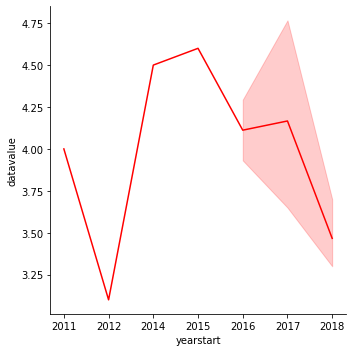

<Figure size 1440x360 with 0 Axes>

In [123]:
#Trend the Recent physically unhealthy days data over time
sns.relplot(data=unhealthy_clean_df, x='yearstart', y='datavalue', color='red', kind="line")
plt.figure(figsize=(20,5))

In [127]:
sleep_clean_df['yearstart'].unique()

array(['2018', '2017', '2016'], dtype=object)

<Figure size 2160x360 with 0 Axes>

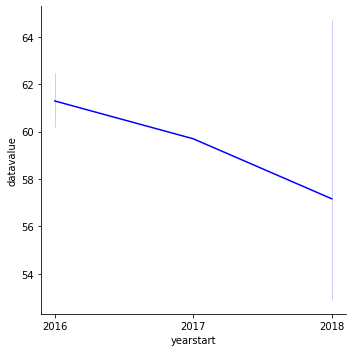

<Figure size 2160x360 with 0 Axes>

In [124]:
#Trend the Prevalence of sufficient sleep data over time
sns.relplot(data=sleep_clean_df, x='yearstart', y='datavalue', color='blue', kind="line")
plt.figure(figsize=(30,5))

In [130]:
activity_clean_df['yearstart'].unique()

array(['2018', '2014', '2017', '2016', '2015', '2013', '2012', '2011'],
      dtype=object)

<Figure size 2160x360 with 0 Axes>

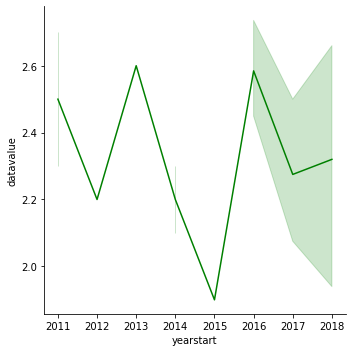

<Figure size 2160x360 with 0 Axes>

In [125]:
#Trend the Recent activity limitation data over time
sns.relplot(data=activity_clean_df, x='yearstart', y='datavalue', color='green', kind="line")
plt.figure(figsize=(30,5))

In [129]:
premort_df['yearstart'].unique()

array(['2016', '2017', '2015', '2014', '2013', '2012', '2011', '2010'],
      dtype=object)

<Figure size 2160x360 with 0 Axes>

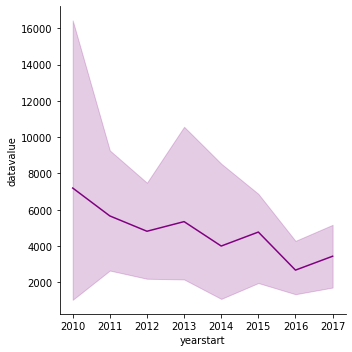

<Figure size 2160x360 with 0 Axes>

In [126]:
#Trend the Premature mortality data over time
sns.relplot(data=premort_df, x='yearstart', y='datavalue', color='purple', kind="line")
plt.figure(figsize=(30,5))

#Exploratory Data Analysis

For the EDA portion of my analysis, I used different types of seaborn plots to plot each of the 4 indicator datasets by state. This means that in each plot, the x-axis is the state while the y-axis is the data value. Results of the Unhealthy plot are consistent with what I queried earlier, in that TN is the maximum and NY is the minimum, which on the plot is nearly the same level as CA (2.4 vs. 2.7). Next, I used the point plot for the Sleep data, the line plot for the Activity data, and the bar plot for the Premort data. All plot results are consistent with the minimum and maximum yielded by my previous descriptive statistical analysis. All plots except for the Premort plot shows a significant amount of variation across the states. The Premort plot shows that TX is an outlier with a much greater number than the rest of the states. Lastly, I created an interactive time-series plot using plotly for the Sleep data, allowing one to delve into detailed trends over smaller time units.

In [131]:
# load visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

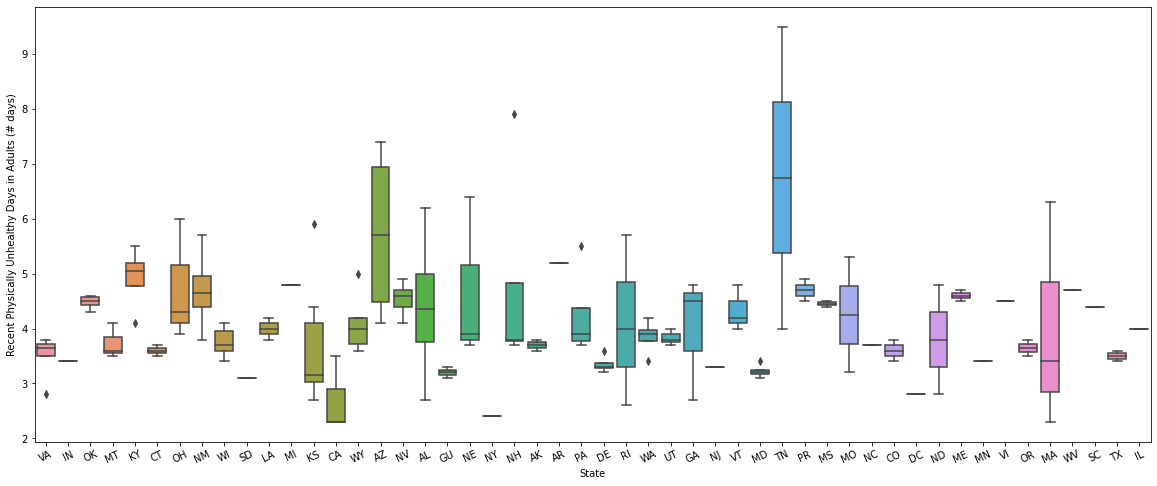

In [132]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=25)

sns.boxplot(data=unhealthy_clean_df, x='locationabbr', y='datavalue')
plt.xlabel("State")
plt.ylabel("Recent Physically Unhealthy Days in Adults (# days)")
plt.show()

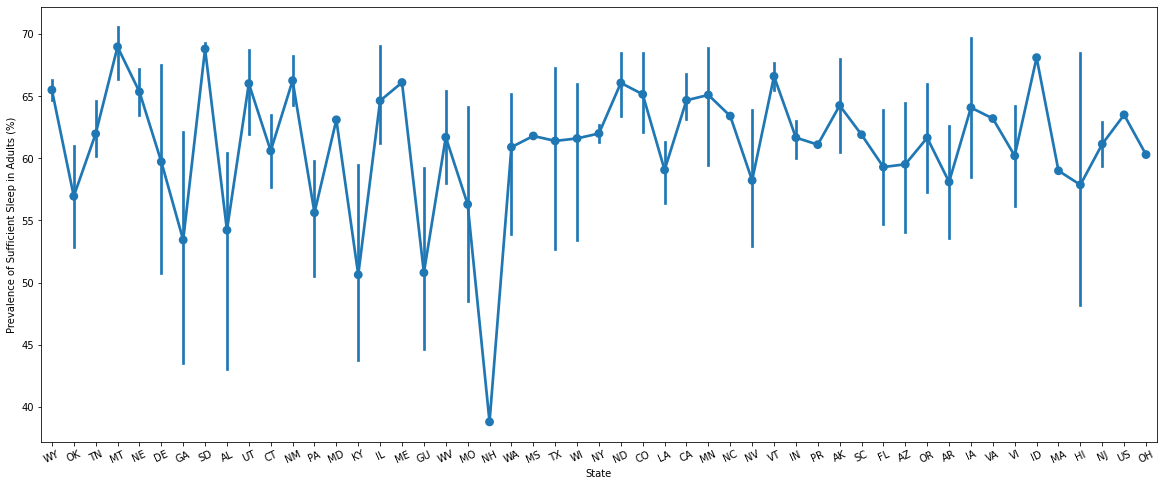

In [133]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=25)

sns.pointplot(data=sleep_clean_df, x='locationabbr', y='datavalue')
plt.xlabel("State")
plt.ylabel("Prevalence of Sufficient Sleep in Adults (%)")

plt.show()

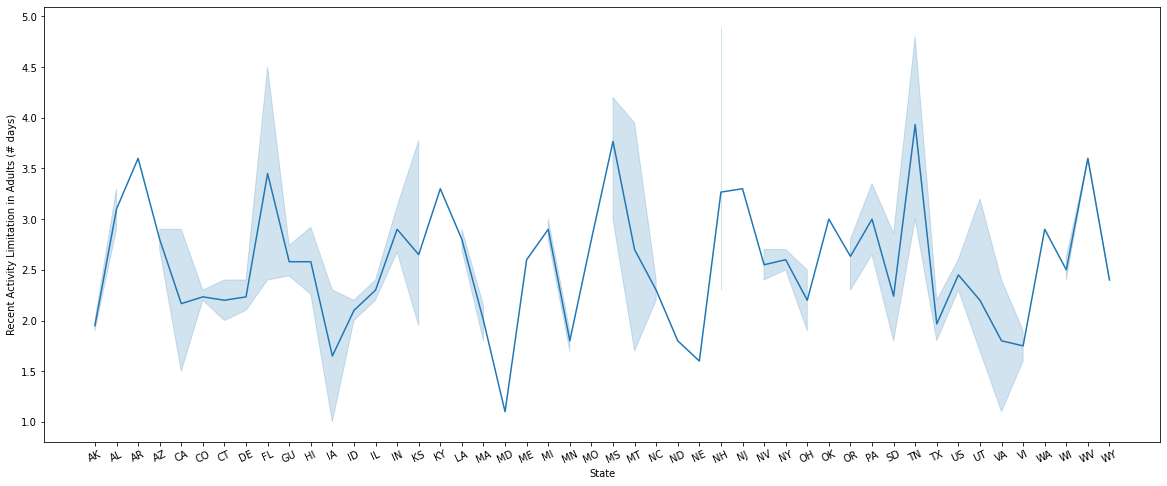

In [134]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=25)

sns.lineplot(data=activity_clean_df, x='locationabbr', y='datavalue')
plt.xlabel("State")
plt.ylabel("Recent Activity Limitation in Adults (# days)")

plt.show()

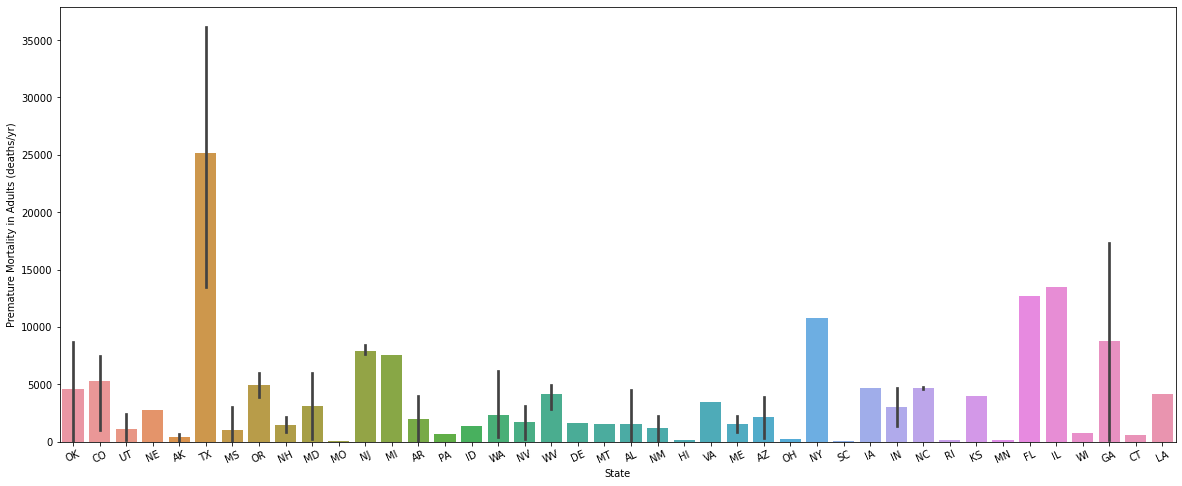

In [135]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=25)

sns.barplot(data=premort_df, x='locationabbr', y='datavalue')
plt.xlabel("State")
plt.ylabel("Premature Mortality in Adults (deaths/yr)")

plt.show()

In [136]:
import plotly.graph_objects as go

In [137]:
# Create figure
fig_sleep = go.Figure()

fig_sleep.add_trace(
    go.Scatter(x=list(sleep_clean_df.yearstart), y=list(sleep_clean_df.datavalue)))

# Set title
fig_sleep.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig_sleep.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_sleep.show()



#Conclusions

1) The data analysis results imply that TN residents 
have more trouble getting physically active, as demonstrated by the high number of recent physically unhealthy days as well as high number of recent activity limitation days. This may be attributed to this state having a largely suburban/rural geographic spread. 

2) In contrast to the above, NY and MD are both large metropolitan cities with an extensive public transit system and are generally considered to be very walkable, which may explain why these two states have the lowest numbers for these two indicators.

3) It’s surprising to me that NH residents do not tend to get enough sleep. This poses a curious case study that warrants further research.

4) The premature mortality rate in TX is roughly 1000 times more than that in SC, which is an astonishing difference. 

5) Trends over time show that overall, the nation seems to be living healthier, with decreases in number of days when folks feel physically unhealthy and annual number of deaths in adults aged 45-64 years. However, other data point to the opposite, with people less likely to get enough sleep over the past few years.

# Reference: 
1. https://healthdata.gov/dataset/us-chronic-disease-indicators-cdi

2. https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725

3. https://dev.socrata.com/consumers/getting-started.html

4. https://dev.socrata.com/foundry/chronicdata.cdc.gov/g4ie-h725

5. https://dev.socrata.com/docs/filtering.html
